Stephanie Rivera

Time series analysis on the Kaggle dataset "Trending YouTube Video Statistics"

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
usa_trending = pd.read_csv("../data/USvideos.csv")

In [4]:
usa_trending.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [3]:
#keep relevant columns
youtube_views = usa_trending[['trending_date', 'category_id','views','likes','dislikes','comment_count']].copy()

In [4]:
INPUT_FORMAT = '%y.%d.%m'
OUTPUT_FORMAT = '%m-%d-%Y'

datetime.strptime('17.14.11',INPUT_FORMAT).strftime(OUTPUT_FORMAT)

'11-14-2017'

In [5]:
#change weird trending date format
for index, row in youtube_views.iterrows():
    string = row['trending_date']
    changed_date = datetime.strptime(string,INPUT_FORMAT).strftime(OUTPUT_FORMAT)
    #row['trending_date'] = changed_date
    youtube_views.set_value(index,'trending_date',changed_date)

/home/mgray/Documents/Data_Science/Time_Series_Analysis/Youtube-forecasting/env/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [8]:
#youtube_views.index = pd.to_datetime(youtube_views.trending_date)

In [6]:
youtube_views.head()
youtube_views['trending_date'] = pd.to_datetime(youtube_views['trending_date'])

In [7]:
youtube_views.head()
youtube_views2 = youtube_views.groupby('trending_date')['views'].agg({"views": "sum"})
#youtube_views2

/home/mgray/Documents/Data_Science/Time_Series_Analysis/Youtube-forecasting/env/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


# All Categories

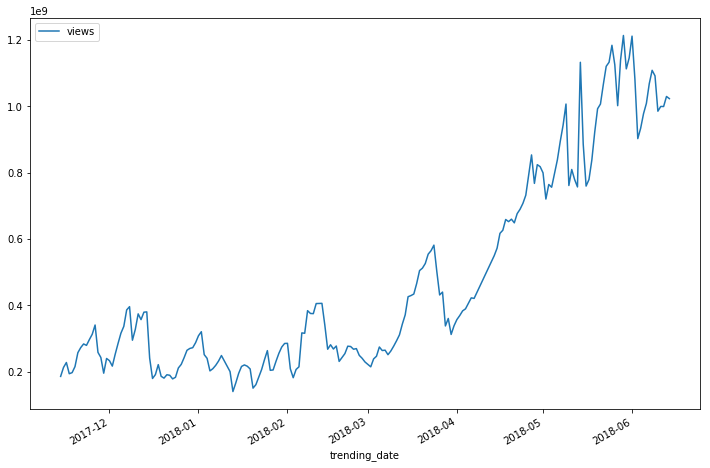

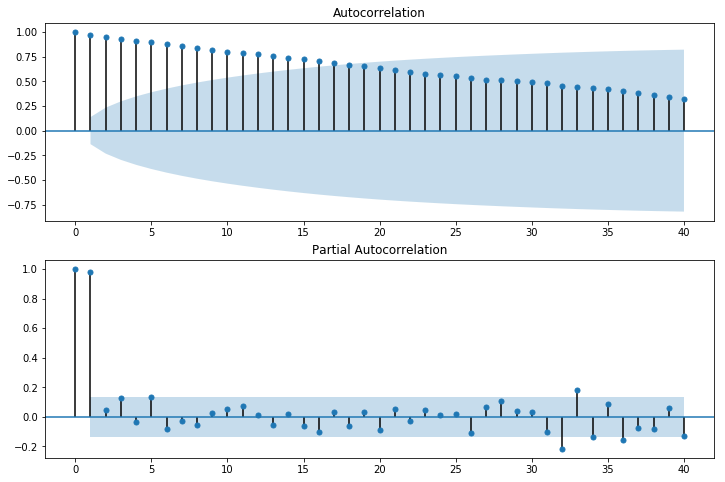

In [8]:
dta = youtube_views2

dta.plot(figsize=(12,8));
plt.show()

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)
plt.show()

In [9]:
def get_categoryinfo(data_frame,category):
    cat = category
    data_frame = data_frame.loc[data_frame['category_id'] == cat]
    data_frame['trending_date'] = pd.to_datetime(data_frame['trending_date'])
    data_frame2 = data_frame.groupby('trending_date')['views'].agg({"views": "sum"})
    return data_frame2

In [10]:
#filter data by top 3 categories: music(10), entertainment(24), people & blogs (22)

music = get_categoryinfo(youtube_views,10)
entertainment = get_categoryinfo(youtube_views,24)
ppl_blogs = get_categoryinfo(youtube_views,22)


/home/mgray/Documents/Data_Science/Time_Series_Analysis/Youtube-forecasting/env/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/mgray/Documents/Data_Science/Time_Series_Analysis/Youtube-forecasting/env/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """


# Music

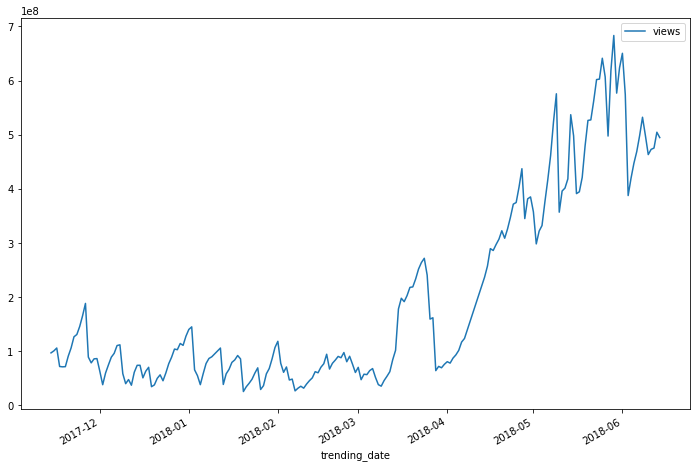

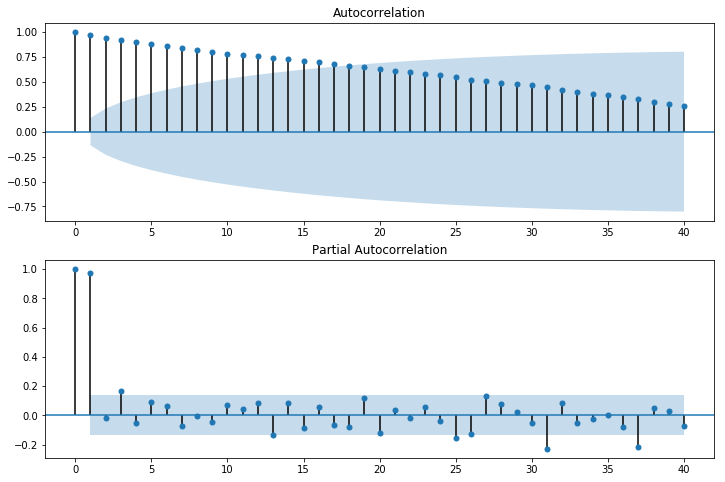

In [11]:
dta = music


dta.plot(figsize=(12,8));
plt.show()

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)
plt.show()

# Entertainment

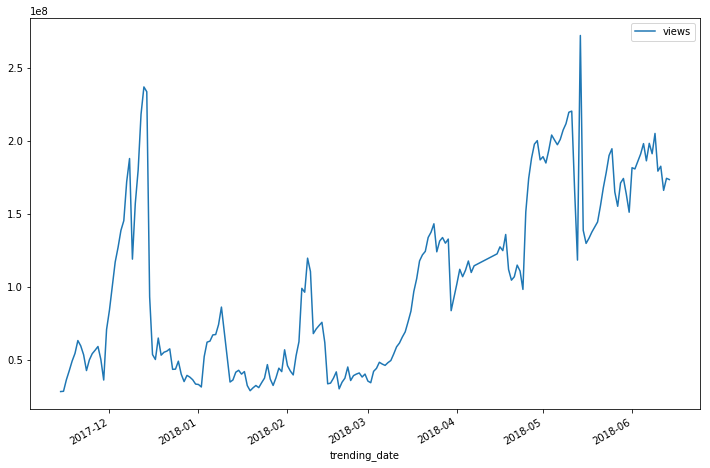

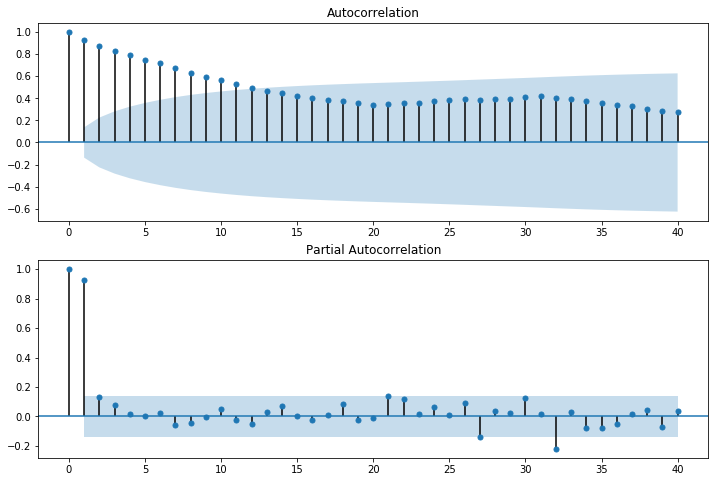

In [12]:
dta = entertainment


dta.plot(figsize=(12,8));
plt.show()

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)
plt.show()

# People & Blogs

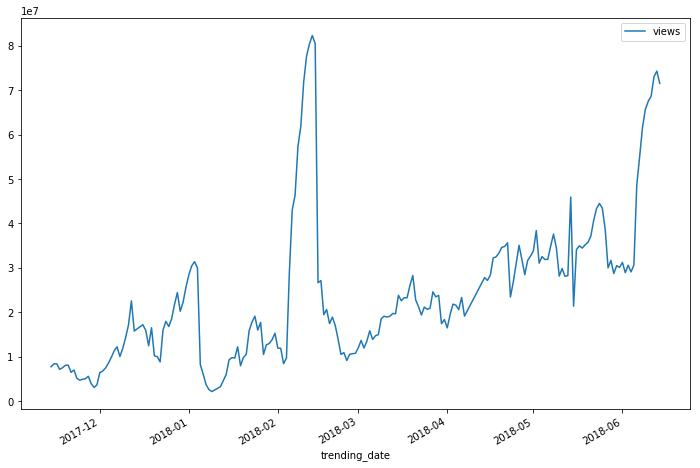

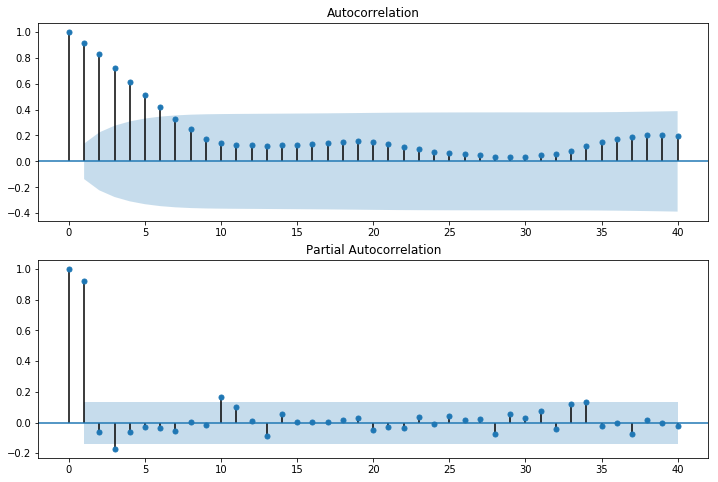

In [13]:
dta = ppl_blogs


dta.plot(figsize=(12,8));
plt.show()

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)
plt.show()

In [58]:
dta = dta.astype('float32').asfreq("1d").ffill()

arma_mod10 = sm.tsa.ARMA(dta, (1,0)).fit(disp=False)
print(arma_mod10.params)
print(arma_mod10.aic, arma_mod10.bic, arma_mod10.hqic)

arma_mod20 = sm.tsa.ARMA(dta, (2,0)).fit(disp=False)
print(arma_mod20.params)
print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

arma_mod30 = sm.tsa.ARMA(dta, (3,0)).fit(disp=False)
print(arma_mod30.params)
print(arma_mod30.aic, arma_mod30.bic, arma_mod30.hqic)


const          2.364511e+07
ar.L1.views    9.520211e-01
dtype: float64
7245.555670055082 7255.639546552211 7249.630900185407
const          2.364511e+07
ar.L1.views    9.896508e-01
ar.L2.views   -4.089861e-02
dtype: float64
7247.212267265853 7260.6574359286915 7252.645907439619
const          2.364511e+07
ar.L1.views    9.823998e-01
ar.L2.views    1.424614e-01
ar.L3.views   -1.927295e-01
dtype: float64
7241.437050387609 7258.243511216156 7248.229100604816


/home/mgray/Documents/Data_Science/Time_Series_Analysis/Youtube-forecasting/env/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/mgray/Documents/Data_Science/Time_Series_Analysis/Youtube-forecasting/env/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/home/mgray/Documents/Data_Science/Time_Series_Analysis/Youtube-forecasting/env/lib/python3.7/site-packages/scipy/signal/signalt

In [44]:
print(arma_mod10.arroots)
print(arma_mod20.arroots)
print(arma_mod30.arroots)

[1.05039684]
[ 1.05659368 23.1410702 ]
[-2.35715223  1.10590777  1.99042212]


In [45]:
print(sm.stats.durbin_watson(arma_mod10.resid.values))
print(sm.stats.durbin_watson(arma_mod20.resid.values))
print(sm.stats.durbin_watson(arma_mod30.resid.values))

1.8899687530662839
1.977063086147079
1.987796254939035


The durbin watson statistic is a number that tests for autocorrelation in the residuals and is always between 0 and 4, a value of 2 indicates no autocorrelation in the sample. Values from 0 to less than 2 indicate positive autocorrelation.

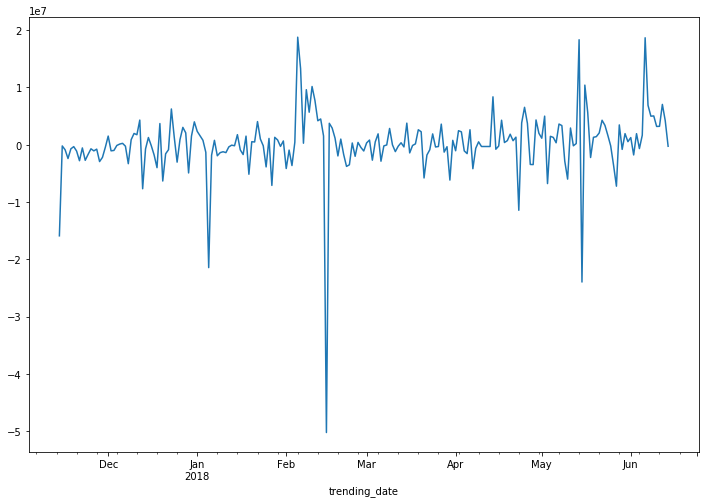

In [46]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod30.resid.plot(ax=ax);
plt.show()

In [47]:
from scipy import stats
resid = arma_mod30.resid
print(stats.normaltest(resid))

NormaltestResult(statistic=197.48539925924507, pvalue=1.307947832881356e-43)


The normaltestresult() shows a pvalue=1.500685248904302e-11, since the p-value < 0.05 we can reject the null that the residuals are normally distributed. The plot shows a heavy tail. 

In [48]:
dta = dta.asfreq("1d")

In [49]:
import statsmodels.tsa.api as smt
mdl = smt.AR(dta).fit(maxlag=7, ic='aic', trend='nc')

In [63]:
est_order = smt.AR(dta).select_order(maxlag=12, ic='bic', trend='nc')

print(est_order)

1


/home/mgray/Documents/Data_Science/Time_Series_Analysis/Youtube-forecasting/env/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [56]:
dta.head()

,views
trending_date,
2017-11-14,7753285.0
2017-11-15,8407922.0
2017-11-16,8423782.0
2017-11-17,7180424.0
2017-11-18,7526963.0


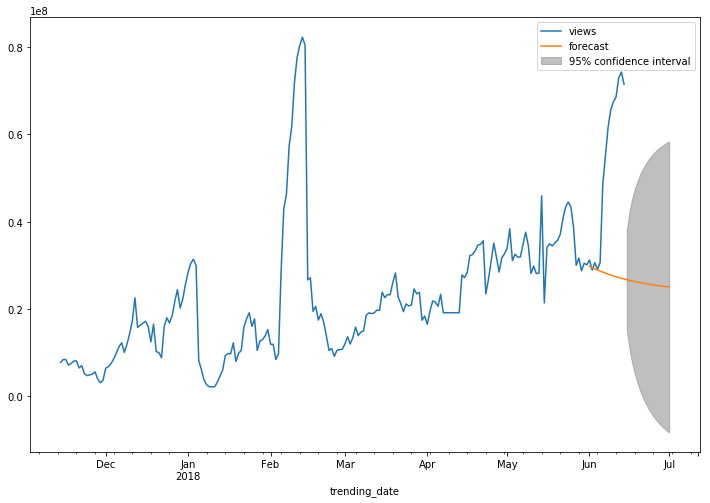

In [61]:
#predict_sunspots = arma_mod10.predict('2018-06-01', '2018-07-01', dynamic=True)
#print(predict_sunspots)

fig, ax = plt.subplots(figsize=(12, 8))
ax = dta.loc['2017-11-14':].plot(ax=ax)
fig = arma_mod10.plot_predict('2018-06-01', '2018-07-01', dynamic=True, ax=ax, plot_insample=False)
plt.show()

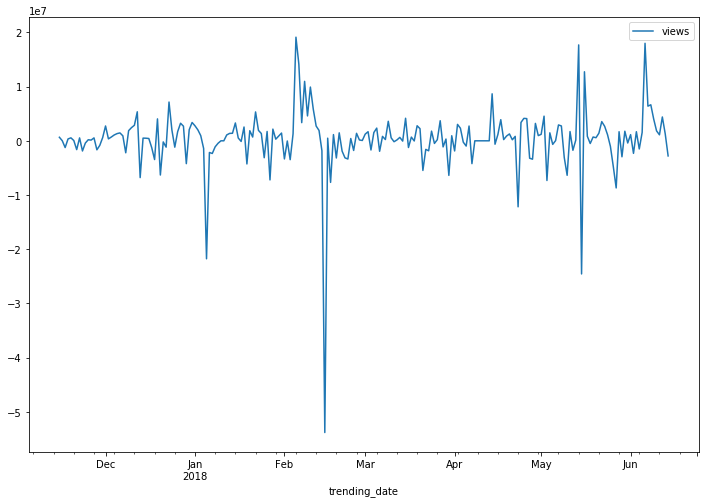

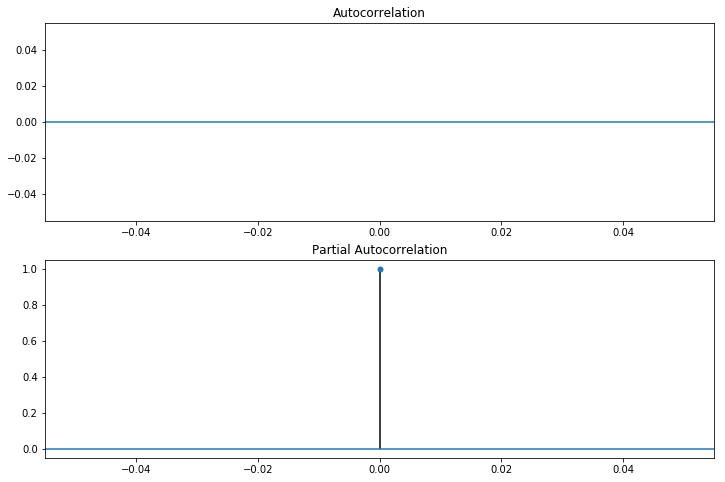

In [73]:
dta.diff().plot(figsize=(12,8));
plt.show()

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.diff().values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta.diff(), lags=40, ax=ax2)
plt.show()

In [93]:
arima = sm.tsa.ARIMA(dta, order=(2,1,1)).fit()

In [94]:
arima.arroots, arima.maroots

(array([ 2.34444249, -2.90554016]), array([12.51764853]))

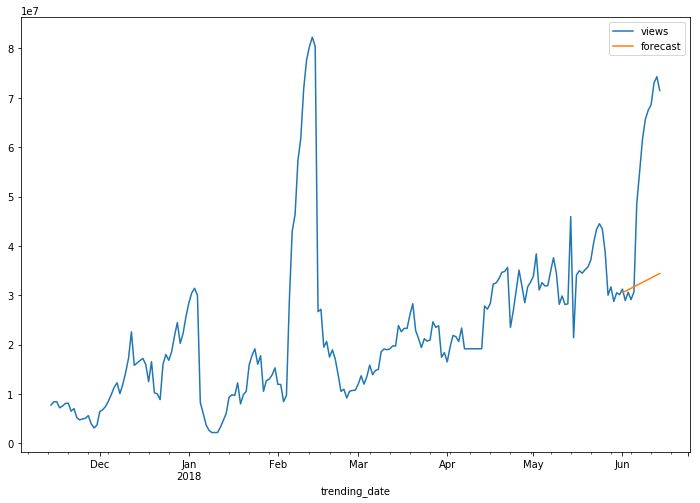

In [98]:
fig, ax = plt.subplots(1,1,figsize=(12, 8))
dta.plot(ax=ax);
arima.plot_predict(plot_insample=False, dynamic=True, start="2018-06-01", ax=ax);